# ***PHASE 2 PROJECT***

![Long and Foster](Images/Long_and_Foster.png)

# 1. BUSINESS UNDERSTANDING

Real estate company Long and Foster has expanded their operations to King County, Washington, and is interested in developing a predictive model that can estimate the sale price of a house. Being new to the area, they are not familiar with the housing landscape and need to better understand their market. By analyzing various factors such as the number of bedrooms, bathrooms, square footage of the house, location, and other important features, L&F aim to provide more accurate home sale price estimates to their clients and improve their business efficiency.

The modeling process will also help Long and Foster identify potential investment opportunities in the county by analyzing which features have the most significant impact on the sale price of a house. By using the results of the analysis, the company can make better decisions regarding their investments in the county.

The objective of this project is to create a multiple linear regression model that can predict the sale price of a house based on predictive factors and provide insights that can help Long and Foster improve their business operations.

### Why multiple linear regression?

Instead of a basic, exploratory data analysis, we are using statistical analyses, such as regression coefficients and R-squared values. Such statistics allow us to identify and tactically measure the relationships between different variables in our data. Basic data analysis (i.e. creating graphs and charts) help us visualize our data and identify patterns, but it does not provide us with a formal measure of the strength of the relationships or the predictive power of the variables.

Regression analysis estimate the coefficients of each variable and their statistical significance, which helps us to understand the relative importance of each variable in predicting the target (price).

In addition, regression analysis allows us to control for the effects of other variables in the model and assess their impact on the dependent variable. This allows us to isolate the effect of each independent variable on the dependent variable and identify potential investment opportunities based on the variables that have the most significant impact on house prices.

### The Dataset

For this project, we are using 'kc_house_data.csv', a public, tabular dataset lifted from from King County, WA's website (kingcounty.gov).

Our target variable is 'price', which records final sale price of King County homes. Columns serve as features (predictors) in this dataset. The dataset has been updated to include homes sold up until the year 2022.

# 2. DATA UNDERSTANDING

In [1]:
# Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Reading dataset as a pandas DataFrame
df = pd.read_csv('data/kc_house_data.csv')

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
# Inspecting dataframe head
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [3]:
# Getting descriptive statistics of the dataframe
df.describe

<bound method NDFrame.describe of                id        date      price  bedrooms  bathrooms  sqft_living  \
0      7399300360   5/24/2022   675000.0         4        1.0         1180   
1      8910500230  12/13/2021   920000.0         5        2.5         2770   
2      1180000275   9/29/2021   311000.0         6        2.0         2880   
3      1604601802  12/14/2021   775000.0         3        3.0         2160   
4      8562780790   8/24/2021   592500.0         2        2.0         1120   
...           ...         ...        ...       ...        ...          ...   
30150  7834800180  11/30/2021  1555000.0         5        2.0         1910   
30151   194000695   6/16/2021  1313000.0         3        2.0         2020   
30152  7960100080   5/27/2022   800000.0         3        2.0         1620   
30153  2781280080   2/24/2022   775000.0         3        2.5         2570   
30154  9557800100   4/29/2022   500000.0         3        1.5         1200   

       sqft_lot  floors water

In [4]:
df.shape

(30155, 25)

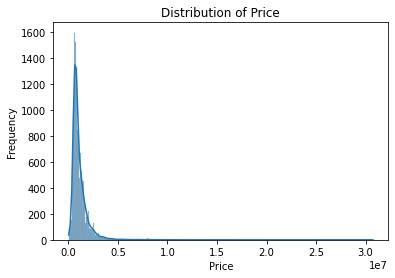

In [5]:
# Plot histogram with distribution curve for target variable 'price'
sns.histplot(data=df, x='price', kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()

In [6]:
df.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

### Summary of Data Understanding

- There are 30,155 observations and 25 features in the dataset.

- Numeric predictors are: 'id' (recordor observation number), 'date' (date sold), 'bedrooms' (no. bedrooms), 'bathrooms' (no. bathrooms), 'sqft_above'(square footage of home apart from basement), 'sqft_living'(square footage of living space in the home),'sqft_lot'(square footage of lot), 'sqft_garage'(square footage of garage), 'sqft_patio(square footage of outdoor patio),'floors'(number of floors, including levels, in the home), 'yr_built'(year home was built), 'yr_renovated'(if and when home was renovated), 'lat'(latitude coordinate), and 'long'(longitude coordinate).

- Categorical predictors are: 'waterfront'(whether or not home is on a waterfront, eg. Puget Sound, Lake Washington, etc.), 'greenbelt'(whether or not home is near or adjacent to a green belt or natural land),'nuisance'(whether or not the home is near an airport, heavy traffic, or other notable nuisances), 'view'(quality of both nature and city views from the home), 'condition'(overall codified condition of the house as defined by (https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r), 'grade'(overall grade of the house pertaining to construction and design), 'heat_source'(heat source type), and 'sewer_system'(sewer system type).

- There are 32 null values in feature 'heat_source' and 14 in 'sewer_system'.

- Target 'price' is fairly skewed.


# 3. DATA PREPARATION

### Handling missing values

In [7]:
# Dropping null values 
df = df.dropna(subset=['heat_source', 'sewer_system'])

### Feature engineering

First, let's make a 'house_age' feature that uses 'yr_built' to calculate how old a house is.

In [8]:
import datetime as dt

# Convert 'yr_built' to datetime format
df['yr_built'] = pd.to_datetime(df['yr_built'], format='%Y')

# Calculate age feature
current_year = dt.datetime.now().year
df['house_age'] = current_year - df['yr_built'].dt.year

# Print first 5 rows of transformed data
df['house_age'].head()

<ipython-input-8-ef23c0205458>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['yr_built'] = pd.to_datetime(df['yr_built'], format='%Y')
<ipython-input-8-ef23c0205458>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['house_age'] = current_year - df['yr_built'].dt.year


0    54
1    73
2    67
3    13
4    11
Name: house_age, dtype: int64

In [9]:
# Convert the 'date' column to a datetime object
df['date'] = pd.to_datetime(df['date'])

# Create separate columns for 'month', 'year', and 'day'
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['day'] = df['date'].dt.day

# Create binary features for seasons using 'month' column
df['season_winter'] = df['month'].apply(lambda x: 1 if x in [12, 1, 2] else 0)
df['season_spring'] = df['month'].apply(lambda x: 1 if x in [3, 4, 5] else 0)
df['season_summer'] = df['month'].apply(lambda x: 1 if x in [6, 7, 8] else 0)
df['season_fall'] = df['month'].apply(lambda x: 1 if x in [9, 10, 11] else 0)

<ipython-input-9-087c5335e57d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
<ipython-input-9-087c5335e57d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['date'].dt.month
<ipython-input-9-087c5335e57d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [10]:
# Creating new feature 'ppsqft' (price per square foot of living space)
df['pp_sqft'] = df['price'] / df['sqft_living']

<ipython-input-10-a2054534b1e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pp_sqft'] = df['price'] / df['sqft_living']


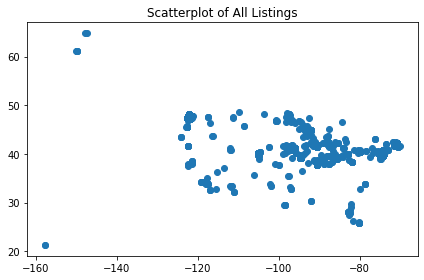

In [11]:
# Plotting all listings by longitude and latitude
fig, ax = plt.subplots()
ax.scatter(df['long'],df['lat'])

plt.title('Scatterplot of All Listings')
fig.tight_layout();

In [12]:
# Extracting state from address
df['state'] = df['address'].apply(lambda x: str(x).split(' ')[-4])
# extract zip code from address
df['zip'] = df['address'].apply(lambda x: str(x).split(' ')[-3].replace(',', ''))
# extract city from address
df['city'] = df['address'].apply(lambda x: str(x).split(',')[-3].strip())

<ipython-input-12-50654eafd615>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state'] = df['address'].apply(lambda x: str(x).split(' ')[-4])
<ipython-input-12-50654eafd615>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zip'] = df['address'].apply(lambda x: str(x).split(' ')[-3].replace(',', ''))
<ipython-input-12-50654eafd615>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [13]:
# Printing summary of listings
print('Total listings: ' + str(len(df)))
print('Out of state listings: ' + str(len(df[df['state'] != 'Washington'])))

Total listings: 30111
Out of state listings: 907


In [14]:
# Creating a set out of state records to rop
out_of_state = set(df[df['state'] != 'Washington'].index)

# Dropping out of state records
df.drop(out_of_state, inplace=True)

<ipython-input-14-907968b8ea8e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(out_of_state, inplace=True)


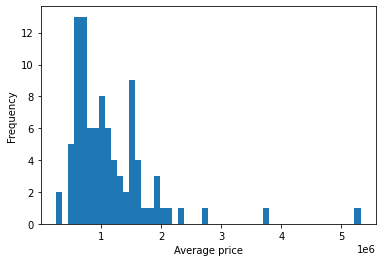

In [15]:
# Group the DataFrame by zip code and calculate the mean price
zip_avg_price = df.groupby('zip').agg({'price': 'mean'})

# Plot a histogram of the mean prices
plt.hist(zip_avg_price['price'], bins=50)
plt.xlabel('Average price')
plt.ylabel('Frequency')
plt.show()

In [16]:
# Group the DataFrame by zip code and calculate the mean price
df_zip = df.groupby('zip')['price'].mean()

# Define the number of tiers for zip codes
num_tiers = 8

# Calculate the quantiles for zip code prices and create a list of zip codes in each tier
zip_tier = [list(df_zip[(df_zip > df['price'].quantile(q/num_tiers)) & 
                        (df_zip < df['price'].quantile((q+1)/num_tiers))].index)
            for q in range(num_tiers)]

# Create a function to assign zip codes to tiers
def assign_zip_tier(zip_code):
    return next((i for i, tier in enumerate(zip_tier) if zip_code in tier), np.nan)

# Create the 'zip_tier' feature using the assign_zip_tier function
df['zip_tier'] = df['zip'].apply(assign_zip_tier)

<ipython-input-16-ac15eb27f225>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zip_tier'] = df['zip'].apply(assign_zip_tier)


In [17]:
# Create a dictionary to store the zip code ranges for each zip_tier
zip_tier_ranges = {}
for i, tier in enumerate(zip_tier):
    min_zip = min(tier)
    max_zip = max(tier)
    zip_tier_ranges[i+1] = (min_zip, max_zip)

# Print the zip_tiers and their corresponding zip codes
for tier, (min_zip, max_zip) in zip_tier_ranges.items():
    zip_codes = df.loc[df['zip'].between(min_zip, max_zip), 'zip']
    print(f"Zip Tier {tier}: {', '.join(zip_codes.astype(str).unique())}")


Zip Tier 1: 98055, 98133, 98178, 98118, 98027, 98166, 98030, 98023, 98019, 98144, 98031, 98092, 98103, 98006, 98136, 98007, 98038, 98057, 98077, 98126, 98053, 98039, 98107, 98008, 98155, 98168, 98199, 98004, 98045, 98052, 98011, 98002, 98033, 98116, 98198, 98125, 98112, 98034, 98056, 98059, 98005, 98040, 98014, 98106, 98029, 98122, 98003, 98117, 98042, 98119, 98065, 98022, 98072, 98058, 98108, 98115, 98074, 98105, 98024, 98146, 98109, 98102, 98028, 98188, 98177, 98075, 98010, 98148, 98047, 98032, 98070, 98051, 98288, 98354, 98272, 98296, 98271, 98050, 98387, 98251, 98223, 98338, 98224, 98372, 98422, 98270
Zip Tier 2: 98055, 98133, 98178, 98118, 98027, 98166, 98030, 98023, 98019, 98144, 98031, 98092, 98103, 98006, 98136, 98007, 98038, 98057, 98077, 98126, 98053, 98039, 98107, 98008, 98155, 98168, 98199, 98004, 98045, 98052, 98011, 98002, 98033, 98116, 98198, 98125, 98001, 98112, 98034, 98056, 98059, 98005, 98040, 98014, 98106, 98029, 98122, 98003, 98117, 98042, 98119, 98065, 98022, 9807

In [18]:
# show how many listings were captures in each of 5 zip tiers
df['zip_tier'].value_counts()

5    6644
6    4902
2    4159
1    3882
3    3561
4    2828
7    2765
0     463
Name: zip_tier, dtype: int64

### Encoding and consolidating categorical features

In [19]:
# One-hot encoding categorical data
df = pd.get_dummies(df, columns=['waterfront', 'sewer_system', 'heat_source', 'zip_tier', 'nuisance', 'greenbelt', 'condition', 'grade'], drop_first=True)
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'view', 'sqft_above', 'sqft_basement',
       'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated', 'address',
       'lat', 'long', 'house_age', 'month', 'year', 'day', 'season_winter',
       'season_spring', 'season_summer', 'season_fall', 'pp_sqft', 'state',
       'zip', 'city', 'waterfront_YES', 'sewer_system_PRIVATE RESTRICTED',
       'sewer_system_PUBLIC', 'sewer_system_PUBLIC RESTRICTED',
       'heat_source_Electricity/Solar', 'heat_source_Gas',
       'heat_source_Gas/Solar', 'heat_source_Oil', 'heat_source_Oil/Solar',
       'heat_source_Other', 'zip_tier_1', 'zip_tier_2', 'zip_tier_3',
       'zip_tier_4', 'zip_tier_5', 'zip_tier_6', 'zip_tier_7', 'nuisance_YES',
       'greenbelt_YES', 'condition_Fair', 'condition_Good', 'condition_Poor',
       'condition_Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'grade_2 Substandard', 'grade_3 Poor

In [20]:
# create new feature 'low_grade'
df['low_grade'] = df[['grade_2 Substandard', 'grade_3 Poor', 'grade_4 Low']].any(axis=1).astype(int)

# create new feature 'average_grade'
df['average_grade'] = df[['grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average']].any(axis=1).astype(int)

# create new feature 'good_grade'
df['good_grade'] = df[['grade_8 Good', 'grade_9 Better', 'grade_11 Excellent']].any(axis=1).astype(int)

# create new feature 'luxury_grade'
df['luxury_grade'] = df[['grade_12 Luxury', 'grade_13 Mansion']].any(axis=1).astype(int)


In [21]:
# Dropping the original encoded 'grade' features
df = df.drop(['grade_2 Substandard', 'grade_3 Poor', 'grade_4 Low',
         'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average',
         'grade_8 Good', 'grade_9 Better', 'grade_11 Excellent',
         'grade_12 Luxury', 'grade_13 Mansion'], axis=1)

# Dropping 'id', 'date', 'address' and 'view' features
df = df.drop(['id', 'date', 'address', 'view'], axis=1)

### Exploring correlation and multicollinearity

In [22]:
# creating a correlation matrix of all features with respect to 'price' 
corr_with_price = df.corr()['price'].sort_values(ascending=False)
print(corr_with_price)

price                              1.000000
sqft_living                        0.616747
sqft_above                         0.546115
bathrooms                          0.488049
zip_tier_7                         0.442547
luxury_grade                       0.344761
sqft_patio                         0.317600
lat                                0.295968
bedrooms                           0.291024
sqft_garage                        0.267510
sqft_basement                      0.246564
waterfront_YES                     0.239686
zip_tier_6                         0.210060
good_grade                         0.199370
floors                             0.199108
heat_source_Gas                    0.145851
sqft_lot                           0.086802
yr_renovated                       0.085517
season_spring                      0.077321
long                               0.074382
year                               0.069764
greenbelt_YES                      0.068351
pp_sqft                         

<ipython-input-22-fa97268aa81d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_with_price = df.corr()['price'].sort_values(ascending=False)


We see that 'sqft_living' as the highest correlation to 'price', and we will likely use it as our feature in our baseline model. Let's visualize 'sqft_living''s distribution, and then we'll visualize the correlated pairs in the dataset.

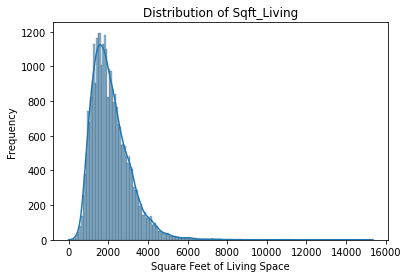

In [23]:
# Plot histogram with distribution curve for variable 'sqft_living'
sns.histplot(data=df, x='sqft_living', kde=True)
plt.xlabel('Square Feet of Living Space')
plt.ylabel('Frequency')
plt.title('Distribution of Sqft_Living')
plt.show()

Much like the raw 'price' data, we see that the distribution of highest-correlated feature 'sqft_living' is skewed. We will address this in future model iterations.

<ipython-input-24-d793caa38ab4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='coolwarm', annot=False, vmin=-1, vmax=1)


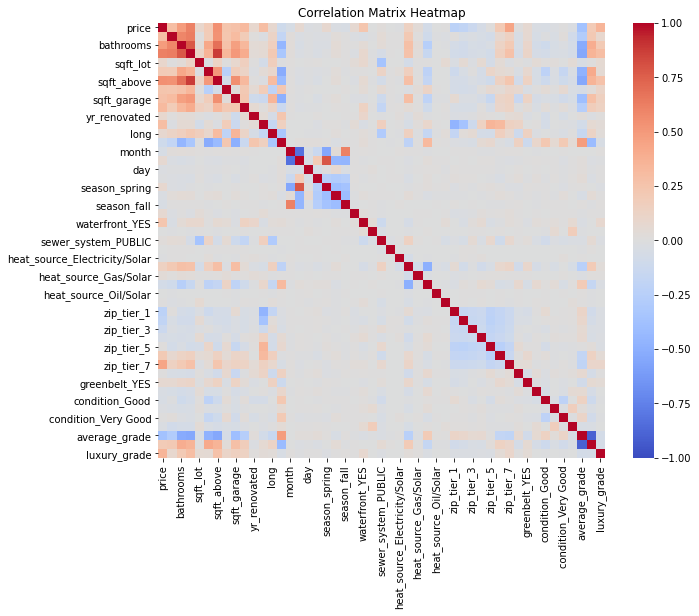

In [24]:
# create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False, vmin=-1, vmax=1)

# add title and rotate y-axis label for better readability
plt.title('Correlation Matrix Heatmap')
plt.yticks(rotation=0)
plt.show()


In [25]:
# Save absolute value of correlation matrix as a data frame
# Converts all values to absolute value
# Stacks the row:column pairs into a multindex
# Reset the index to set the multindex to separate columns
# Sort values. 0 is the column automatically generated by the stacking
df_mc = (
    df.corr()
    .abs()
    .stack()
    .reset_index()
    .sort_values(0, ascending=False)
)

# Zip the variable name columns (which were only named level_0 and level_1 by default) in a new column named "pairs"
df_mc['pairs'] = list(zip(df_mc['level_0'], df_mc['level_1']))

# Set index to pairs
df_mc.set_index(['pairs'], inplace=True)

# Drop level columns
df_mc.drop(columns=['level_1', 'level_0'], inplace=True)

# Rename correlation column as "cc" rather than 0
df_mc.columns = ['cc']

# Filter for correlations between 0.62 and 1
df_mc_filtered = df_mc[(df_mc.cc > 0.62) & (df_mc.cc < 1)]


<ipython-input-25-df317de35b0b>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


In [26]:
df_mc_filtered

,cc
pairs,
"(good_grade, average_grade)",0.898659
"(average_grade, good_grade)",0.898659
"(sqft_living, sqft_above)",0.881746
"(sqft_above, sqft_living)",0.881746
"(month, year)",0.833829
"(year, month)",0.833829
"(season_spring, year)",0.786924
"(year, season_spring)",0.786924
"(sqft_living, bathrooms)",0.779808


# 4. MODELING

### Basline model

In [27]:
# Defining x and y variables
y = df['price']
X_baseline = df['sqft_living']

# Creating the baseline model
baseline_model = sm.OLS(endog=y, exog=sm.add_constant(X_baseline))
baseline_model

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [28]:
# Fitting the model
baseline_results = baseline_model.fit()
baseline_results

In [29]:
print('Model f-statistic:', baseline_results.fvalue)
print('Model p-value:', baseline_results.f_pvalue)
print('R-squared:', baseline_results.rsquared)
print( 'Regression coefficients:', baseline_results.params)

Model f-statistic: 17926.671135891007
Model p-value: 0.0
R-squared: 0.38037718237802987
Regression coefficients: const         -92223.532426
sqft_living      565.408659
dtype: float64


### Baseline model results interpretation

***The model's F-statistic*** is 17926.67, which indicates that the model is significant and that at least one of the predictor variables is useful for predicting the target variable (price). The p-value of 0.0 indicates that the model is statistically significant and that there is strong evidence that at least one of the predictors is related to the target variable.

***The R-squared value*** of 0.3804 indicates that the model explains about 38% of the variance in the target variable. This means that there is still a lot of unexplained variation in the target variable that is not accounted for by the predictor variable (sqft_living).

***The regression coefficient for sqft_living*** is 565.41, which means that for each additional square foot of living space, the sale price of the home increases by $565.41. The constant term of -92223.53 represents the estimated value of the target variable when the predictor variable is zero (i.e., when the living space is zero). However, this interpretation is not meaningful in this case since it is impossible for a home to have zero living space.

### Baseline model visualization

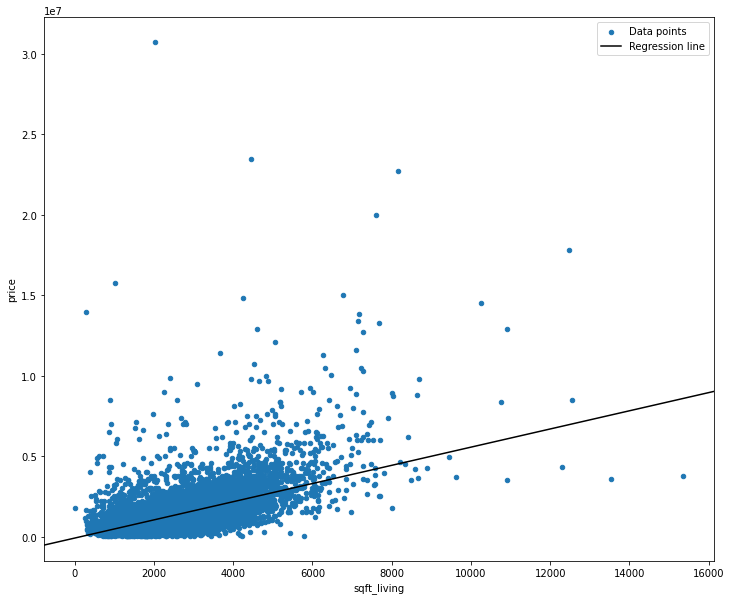

In [30]:
fig, ax = plt.subplots(figsize=(12,10))
df.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=baseline_results, label="Regression line", ax=ax, color="black")
ax.legend()
plt.show()

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


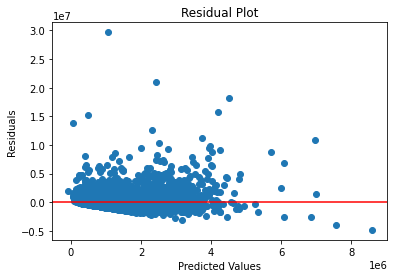

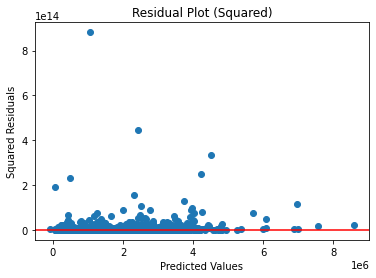

In [31]:
# Generate predictions using the baseline model
y_pred = baseline_results.predict(sm.add_constant(X_baseline))

# Residual plot to check for linearity and homoscedasticity
residuals = y - y_pred
plt.scatter(y_pred, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# Plotting the residuals against the fitted values to check for homoscedasticity
plt.scatter(y_pred, residuals ** 2)
plt.title('Residual Plot (Squared)')
plt.xlabel('Predicted Values')
plt.ylabel('Squared Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


We see from the residual plots abpve that our baseline model violates assumptions of linearity (first plot) and homoscedasicity (first plot). This means we might have to transform some variables.  

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


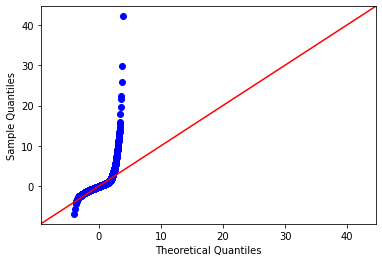

In [32]:
from scipy import stats

# Creating qq plot to visualize residuals
sm.graphics.qqplot(baseline_results.resid, dist=stats.norm, line='45', fit=True)
plt.show()

The qq plot above shows that a large portion of the true data points in 'sqft_living' stray far from normal distribution. This means that the model is underestimating the price for many of the higher values of 'sqft_living'. This is even further evidence that we should log-transform. Let's do it.

### Log transformations

In [33]:
# Log transforming target 'price'
df['price_log'] = np.log(df['price'])

# Log transforming 'sqft_living'
df['sqft_living_log'] = np.log(df['sqft_living'])

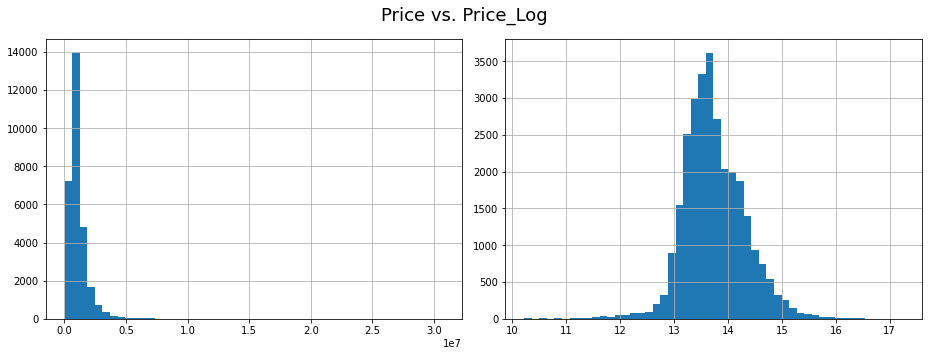

In [34]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,5))

df['price'].hist(ax = ax1, bins=50)
df['price_log'].hist(ax = ax2, bins=50)

fig.suptitle('Price vs. Price_Log', size=18)
fig.tight_layout();

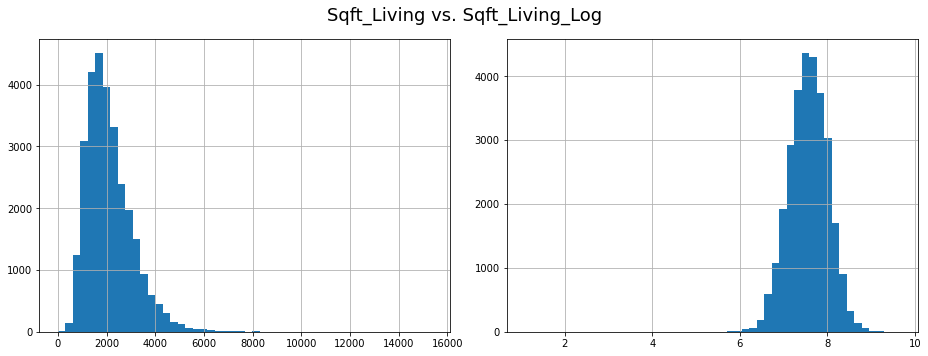

In [35]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,5))

df['sqft_living'].hist(ax = ax1, bins=50)
df['sqft_living_log'].hist(ax = ax2, bins=50)

fig.suptitle('Sqft_Living vs. Sqft_Living_Log', size=18)
fig.tight_layout();

We can see above that log-transforming variables can create a more normal distribution. This will allow us to work better with the data, as linear regression operates on the assumption that distributions are normal. Let's continue to log transform 'sqft' features.

In [36]:
# Log transforming other prominent 'sqft' features
df['sqft_lot_log'] = np.log(df['sqft_lot'])
df['sqft_garage_log'] = np.log(df['sqft_garage'])
df['sqft_patio_log'] = np.log(df['sqft_patio'])
df['sqft_above_log'] = np.log(df['sqft_above'])

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


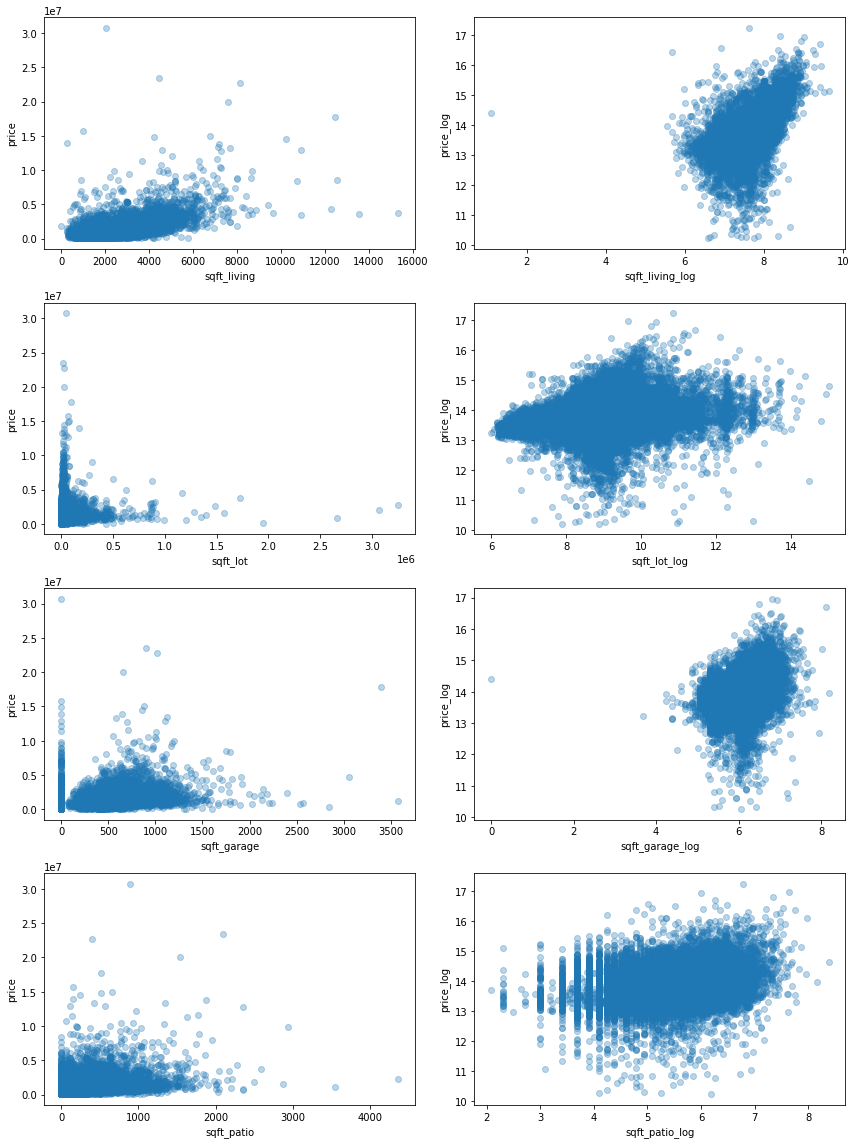

In [37]:
# create a figure with 2 columns and 4 rows of subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12,16))

# scatterplot of sqft_living vs price
axes[0,0].scatter(df['sqft_living'], df['price'], alpha=0.3)
axes[0,0].set_xlabel('sqft_living')
axes[0,0].set_ylabel('price')

# scatterplot of sqft_living_log vs price_log
axes[0,1].scatter(df['sqft_living_log'], df['price_log'], alpha=0.3)
axes[0,1].set_xlabel('sqft_living_log')
axes[0,1].set_ylabel('price_log')

# scatterplot of sqft_lot vs price
axes[1,0].scatter(df['sqft_lot'], df['price'], alpha=0.3)
axes[1,0].set_xlabel('sqft_lot')
axes[1,0].set_ylabel('price')

# scatterplot of sqft_lot_log vs price_log
axes[1,1].scatter(df['sqft_lot_log'], df['price_log'], alpha=0.3)
axes[1,1].set_xlabel('sqft_lot_log')
axes[1,1].set_ylabel('price_log')

# scatterplot of sqft_garage vs price
axes[2,0].scatter(df['sqft_garage'], df['price'], alpha=0.3)
axes[2,0].set_xlabel('sqft_garage')
axes[2,0].set_ylabel('price')

# scatterplot of sqft_garage_log vs price_log
axes[2,1].scatter(df['sqft_garage_log'], df['price_log'], alpha=0.3)
axes[2,1].set_xlabel('sqft_garage_log')
axes[2,1].set_ylabel('price_log')

# scatterplot of sqft_patio vs price
axes[3,0].scatter(df['sqft_patio'], df['price'], alpha=0.3)
axes[3,0].set_xlabel('sqft_patio')
axes[3,0].set_ylabel('price')

# scatterplot of sqft_patio_log vs price_log
axes[3,1].scatter(df['sqft_patio_log'], df['price_log'], alpha=0.3)
axes[3,1].set_xlabel('sqft_patio_log')
axes[3,1].set_ylabel('price_log')

# adjust the spacing between the subplots
fig.tight_layout()

# display the plot
plt.show()


Looks like all of these 'sqft' features (numerical, continuous) look more normal and linear when log transformed. We will work with these moving forward. Let's try to iterate our baseline model, using all of these log-transformed features:

In [38]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'lat', 'long', 'house_age', 'month', 'year', 'day',
       'season_winter', 'season_spring', 'season_summer', 'season_fall',
       'pp_sqft', 'state', 'zip', 'city', 'waterfront_YES',
       'sewer_system_PRIVATE RESTRICTED', 'sewer_system_PUBLIC',
       'sewer_system_PUBLIC RESTRICTED', 'heat_source_Electricity/Solar',
       'heat_source_Gas', 'heat_source_Gas/Solar', 'heat_source_Oil',
       'heat_source_Oil/Solar', 'heat_source_Other', 'zip_tier_1',
       'zip_tier_2', 'zip_tier_3', 'zip_tier_4', 'zip_tier_5', 'zip_tier_6',
       'zip_tier_7', 'nuisance_YES', 'greenbelt_YES', 'condition_Fair',
       'condition_Good', 'condition_Poor', 'condition_Very Good', 'low_grade',
       'average_grade', 'good_grade', 'luxury_grade', 'price_log',
       'sqft_living_log', 'sqft_lot_log', 'sqft_garage_log', 'sq

In [39]:
# creating a correlation matrix of all features with respect to 'price' 
corr_with_price_log = df.corr()['price_log'].sort_values(ascending=False)
print(corr_with_price_log)

<ipython-input-39-47ff5a5d3b5c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_with_price_log = df.corr()['price_log'].sort_values(ascending=False)


price_log                          1.000000
price                              0.829828
sqft_living                        0.624767
sqft_living_log                    0.593345
sqft_above                         0.550393
sqft_above_log                     0.524963
bathrooms                          0.520244
zip_tier_7                         0.425064
lat                                0.421564
bedrooms                           0.346159
good_grade                         0.318323
sqft_patio                         0.311499
sqft_garage_log                    0.309699
zip_tier_6                         0.299184
sqft_garage                        0.285648
floors                             0.255439
sqft_patio_log                     0.254006
sqft_basement                      0.250153
luxury_grade                       0.190049
heat_source_Gas                    0.185154
sqft_lot_log                       0.168978
waterfront_YES                     0.140657
season_spring                   

In [40]:
df.dtypes

price                                     float64
bedrooms                                    int64
bathrooms                                 float64
sqft_living                                 int64
sqft_lot                                    int64
floors                                    float64
sqft_above                                  int64
sqft_basement                               int64
sqft_garage                                 int64
sqft_patio                                  int64
yr_built                           datetime64[ns]
yr_renovated                                int64
lat                                       float64
long                                      float64
house_age                                   int64
month                                       int64
year                                        int64
day                                         int64
season_winter                               int64
season_spring                               int64


In [41]:
# Dropping yr_built column for next model
df = df.drop(['yr_built', 'state', 'zip', 'state', 'city'], axis=1)

# Converting all integers to floats
df = df.astype('float64')

In [42]:
# Find NaN or infinity values in the DataFrame
print(df.isin([np.nan, np.inf, -np.inf]).sum())

# Replace NaN and infinity values with zeros
df = df.replace([np.nan, np.inf, -np.inf], 0)


price                                 0
bedrooms                              0
bathrooms                             0
sqft_living                           0
sqft_lot                              0
floors                                0
sqft_above                            0
sqft_basement                         0
sqft_garage                           0
sqft_patio                            0
yr_renovated                          0
lat                                   0
long                                  0
house_age                             0
month                                 0
year                                  0
day                                   0
season_winter                         0
season_spring                         0
season_summer                         0
season_fall                           0
pp_sqft                               0
waterfront_YES                        0
sewer_system_PRIVATE RESTRICTED       0
sewer_system_PUBLIC                   0


In [43]:
# Find NaN or infinity values in the DataFrame
print(df.isin([np.nan, np.inf, -np.inf]).sum())


price                              0
bedrooms                           0
bathrooms                          0
sqft_living                        0
sqft_lot                           0
floors                             0
sqft_above                         0
sqft_basement                      0
sqft_garage                        0
sqft_patio                         0
yr_renovated                       0
lat                                0
long                               0
house_age                          0
month                              0
year                               0
day                                0
season_winter                      0
season_spring                      0
season_summer                      0
season_fall                        0
pp_sqft                            0
waterfront_YES                     0
sewer_system_PRIVATE RESTRICTED    0
sewer_system_PUBLIC                0
sewer_system_PUBLIC RESTRICTED     0
heat_source_Electricity/Solar      0
h

In [44]:
from sklearn.preprocessing import MinMaxScaler

# Define target variable (y) and exogenous variables (X)
y = df['price_log']
X = df.drop(['price', 'price_log'], axis=1)

# Scale the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df.drop(['price'], axis=1))

# Convert back to dataframe
cols = df.columns.drop(['price'])
df_scaled = pd.DataFrame(data_scaled, columns=cols, index=df.index)

# Define new target variable and exogenous variables from scaled dataframe
y_scaled = df_scaled['price_log']
X_scaled = df_scaled.drop('price_log', axis=1)

In [45]:
df_multiple_copy = df_scaled.drop(['sqft_living', 'sqft_lot', 'sqft_garage', 'sqft_patio', 'month', 'year', 'yr_renovated', 'day'], axis=1).copy()


### Multiple linear regression- all features model

In [46]:
# Define target variable (y) and exogenous variables (X)
y = df_multiple_copy['price_log']
X = df_multiple_copy.drop(['price_log'], axis=1)

# Add constant to X
X = sm.add_constant(X)

# Create OLS model
second_model = sm.OLS(y, X)

# Fit model and print summary
second_results = second_model.fit()
print(second_results.summary())


                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     1527.
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        10:03:42   Log-Likelihood:                 48583.
No. Observations:               29204   AIC:                        -9.708e+04
Df Residuals:                   29159   BIC:                        -9.670e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


Based on the statistical significance of the coefficients (as indicated by the p-values in the "P>|t|" column), there are a few features that could potentially be dropped to avoid multicollinearity of features: season_winter, sewer_system_PUBLIC RESTRICTED, heat_source_Oil
heat_source_Oil/Solar, heat_source_Other, greenbelt_YES, luxury_grade, sqft_garage_log. We will drop them, along with 'lat' and 'long', from our exogenous features list in our next (and perhaps final) iteration:

### Iterated all-features model

In [47]:
# Define target variable (y) and exogenous variables (X)
y = df_multiple_copy['price_log']
X_final = df_multiple_copy.drop(['price_log', 'bedrooms', 'season_winter', 'sewer_system_PUBLIC RESTRICTED', 'heat_source_Oil', 'heat_source_Oil/Solar', 'greenbelt_YES', 'luxury_grade', 'sqft_garage_log', 'heat_source_Other'], axis=1)

# Add constant to X
X = sm.add_constant(X_final)

# Create OLS model
final_model = sm.OLS(y, X)

# Fit model and print summary
final_results = final_model.fit()
print(final_results.summary())


                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     1862.
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        10:03:43   Log-Likelihood:                 48560.
No. Observations:               29204   AIC:                        -9.705e+04
Df Residuals:                   29167   BIC:                        -9.674e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


### Final model interpretation

There are several feature coefficients that stand out in our final model.

- R-squared and Adj. R-squared: Both values are high (0.697), indicating that the model explains a significant portion of the variance in the dependent variable (price_log), about 70%.

In [48]:
# create a DataFrame with the features and their coefficients
coef_df = pd.DataFrame({'feature': final_results.params.index, 'coef': final_results.params.values})

# sort the DataFrame by the coefficients in descending order
coef_df = coef_df.sort_values(by=['coef'], ascending=False)

# print the DataFrame
coef_df

,feature,coef
11,pp_sqft,0.632085
3,sqft_above,0.302044
33,sqft_living_log,0.215576
5,lat,0.158471
0,const,0.133618
24,zip_tier_7,0.124806
34,sqft_lot_log,0.094420
23,zip_tier_6,0.091991
4,sqft_basement,0.077080
22,zip_tier_5,0.074689


Based on the coefficients, the 7 most significant features and their corresponding coefficients are:

- pp_sqft: 0.632
- sqft_above: 0.302
- sqft_living_log: 0.216
- zip_tier_7: 0.125
- zip_tier_6: 0.092
- sqft_basement: 0.077
- zip_tier_5: 0.075

In [54]:
import math

# Define a function to calculate the percentage increase in price_log
def calc_pct_inc(coeff):
    return (math.exp(coeff) - 1) * 100

# Calculate the percentage increase in price_log for each of the seven features
pp_sqft_pct_inc = calc_pct_inc(0.632)
sqft_above_pct_inc = calc_pct_inc(0.302)
sqft_living_log_pct_inc = calc_pct_inc(0.216)
zip_tier_7_pct_inc = calc_pct_inc(0.125)
zip_tier_6_pct_inc = calc_pct_inc(0.092)
sqft_basement_pct_inc = calc_pct_inc(0.077)
zip_tier_5_pct_inc = calc_pct_inc(0.075)

# Print the percentage increase in price_log for each feature
print("Predicted percentage increase in price_log for pp_sqft: {:.2f}%".format(pp_sqft_pct_inc))
print("Predicted percentage percentage increase in price_log for sqft_above: {:.2f}%".format(sqft_above_pct_inc))
print("Predicted percentage percentage increase in price_log for sqft_living_log: {:.2f}%".format(sqft_living_log_pct_inc))
print("Predicted percentage increase in price_log for zip_tier_7: {:.2f}%".format(zip_tier_7_pct_inc))
print("Predicted percentage increase in price_log for zip_tier_6: {:.2f}%".format(zip_tier_6_pct_inc))
print("Predicted percentage increase in price_log for sqft_basement: {:.2f}%".format(sqft_basement_pct_inc))
print("Predicted percentage increase in price_log for zip_tier_5: {:.2f}%".format(zip_tier_5_pct_inc))


Predicted percentage increase in price_log for pp_sqft: 88.14%
Predicted percentage percentage increase in price_log for sqft_above: 35.26%
Predicted percentage percentage increase in price_log for sqft_living_log: 24.11%
Predicted percentage increase in price_log for zip_tier_7: 13.31%
Predicted percentage increase in price_log for zip_tier_6: 9.64%
Predicted percentage increase in price_log for sqft_basement: 8.00%
Predicted percentage increase in price_log for zip_tier_5: 7.79%


### Final model error analysis

In [53]:
rmse = ((final_results.resid ** 2).sum() / len(y)) ** 0.5
mae = ((np.abs(final_results.resid)).sum()) / len(y)

print('The Root mean squared error value is:', rmse)
print('The mean absolute error value is:', mae)

The Root mean squared error value is: 0.045880257439838104
The mean absolute error value is: 0.027630356623110912


The root mean squared error (RMSE) and mean absolute error (MAE) are both measures of the performance of your model in predicting the target variable. The RMSE is the square root of the average squared difference between the predicted values and the actual values. The lower the RMSE, the better the performance of the model in terms of predicting the target variable.

Similarly, the MAE is the average absolute difference between the predicted values and the actual values. It measures the average magnitude of the errors in the predictions, without considering their direction. A lower MAE indicates better performance of the model in predicting the target variable.

In our case, the RMSE value of 0.0458 indicates that on average, the predicted values of the target variable are off by 0.0458 units from the actual values. Similarly, the MAE value of 0.0276 indicates that on average, the predicted values of the target variable are off by 0.0276 units from the actual values. These values suggest that the model has a reasonably good performance in predicting the target variable, though more could be done to manipulate the data and check for outliers/irrelevance in the data to better capture it.

# 4. MODELING CONCLUSIONS AND RECOMMENDATIONS

***LOCATION IS KEY.***

Recall that Zip Tear 7 consists of these zipcodes: 98055, 98133, 98178, 98118, 98027, 98166, 98030, 98023, 98019, 98144, 98031, 98092, 98103, 98006, 98136, 98007, 98038, 98057, 98077, 98126, 98053, 98039, 98107, 98008, 98155, 98168, 98199, 98004, 98045, 98052, 98011, 98033, 98116, 98198, 98125, 98112, 98034, 98056, 98059, 98005, 98040, 98014, 98106, 98029, 98122, 98117, 98042, 98119, 98065, 98022, 98072, 98058, 98108, 98115, 98074, 98105, 98024, 98146, 98109, 98102, 98028, 98188, 98177, 98075, 98010, 98148, 98047, 98032, 98070, 98051, 98050, 98251, 98223, 98224, 98270.

This information can be used by Long and Foster to identify which areas have the highest demand for homes and which areas are likely to see the greatest appreciation in value over time. By focusing their marketing efforts and investing in properties in these zip codes, they can maximize their profits and provide their clients with the best possible returns on their investments.

Additionally, the zip tier features can also provide valuable insights into the amenities and features of each location. For example, properties in zip_tier_6 and zip_tier_7 are likely to be closer to urban centers and have access to a wider range of amenities, such as restaurants, shopping centers, and public transportation. Properties in zip_tier_5, on the other hand, may be more suburban or rural and offer more space and privacy.

Overall, the zip tier features and their coefficients provide a wealth of information for real estate companies like Long and Foster. By understanding the impact of location on the price of a house, they can make informed decisions about where to invest their resources and how to market their properties to potential buyers.


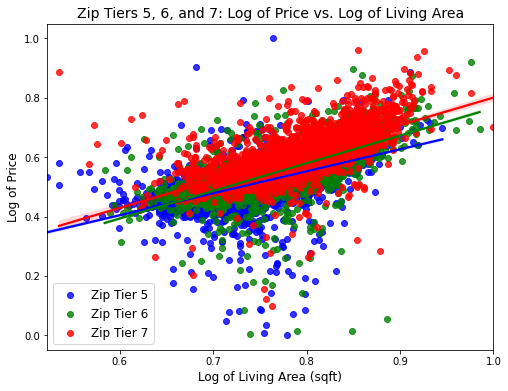

In [57]:
# create three separate dataframes for each zip tier
df_tier5 = df_multiple_copy[df_multiple_copy['zip_tier_5'] == 1]
df_tier6 = df_multiple_copy[df_multiple_copy['zip_tier_6'] == 1]
df_tier7 = df_multiple_copy[df_multiple_copy['zip_tier_7'] == 1]

# plot scatter plot with regression line for each zip code tier
fig, ax = plt.subplots(figsize=(8, 6))

sns.regplot(x='sqft_living_log', y='price_log', data=df_tier5, ax=ax, color='b', label='Zip Tier 5')
sns.regplot(x='sqft_living_log', y='price_log', data=df_tier6, ax=ax, color='g', label='Zip Tier 6')
sns.regplot(x='sqft_living_log', y='price_log', data=df_tier7, ax=ax, color='r', label='Zip Tier 7')

ax.set_xlabel('Log of Living Area (sqft)', fontsize=12)
ax.set_ylabel('Log of Price', fontsize=12)
ax.set_title('Zip Tiers 5, 6, and 7: Log of Price vs. Log of Living Area', fontsize=14)

plt.legend(fontsize=12)
plt.show()

In this plot, we're showing the interaction between sqft_living_log and our top 3 zipcode tiers (5, 6, &7). Between tiers 5 and 7, the datapoints fit progressively closer to the fitted regression lines. It looks like we could have spent some more time checking for outliers in the data to avoid homoscedasicity. However, the relationships appear fairly linear and provide us with the notion that with every increase in zip tier, sqft of living area increases, and consequently, so does home sale price.

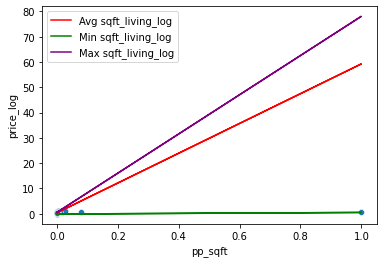

In [60]:
import seaborn as sns
import statsmodels.formula.api as smf

# Create a new column for the interaction term
df_multiple_copy['pp_sqft_sqft_living_log'] = df_multiple_copy['pp_sqft'] * df_multiple_copy['sqft_living_log']

# Fit the model with the updated formula
final_results = smf.ols('price_log ~ pp_sqft + sqft_above + sqft_living_log + zip_tier_7 + zip_tier_6 + sqft_basement + zip_tier_5 + pp_sqft_sqft_living_log', data=df_multiple_copy).fit()

# Get the coefficients
coef_ppsqft = final_results.params['pp_sqft']
coef_sqftliving = final_results.params['sqft_living_log']
coef_ppsqft_sqftliving = final_results.params['pp_sqft_sqft_living_log']

# Generate values for the x and y axes
x = df_multiple_copy['pp_sqft']
y = final_results.params['Intercept'] + coef_ppsqft * x + coef_sqftliving * df_multiple_copy['sqft_living_log'].mean() + coef_ppsqft_sqftliving * x * df_multiple_copy['sqft_living_log'].mean()
y_sqftliving = final_results.params['Intercept'] + coef_ppsqft * x + coef_sqftliving * df_multiple_copy['sqft_living_log'].min() + coef_ppsqft_sqftliving * x * df_multiple_copy['sqft_living_log'].min()
y_sqftliving_max = final_results.params['Intercept'] + coef_ppsqft * x + coef_sqftliving * df_multiple_copy['sqft_living_log'].max() + coef_ppsqft_sqftliving * x * df_multiple_copy['sqft_living_log'].max()

# Create the scatter plot with the regression lines
sns.scatterplot(data=df_multiple_copy, x='pp_sqft', y='price_log')
plt.plot(x, y, color='red', label='Avg sqft_living_log')
plt.plot(x, y_sqftliving, color='green', label='Min sqft_living_log')
plt.plot(x, y_sqftliving_max, color='purple', label='Max sqft_living_log')
plt.legend()
plt.show()


The model can be improved by adding interaction terms, such as 'ppsqft_sqft_living_log', which captures the interaction between both features. 